## Trabalho Final de Machine Leaning
#### Aluno : Renan Lemes Leepkaln
#### Aluno : Valdiclei Costa Marinho

### Explicando o Dataset

* Age - Idade do paciente em anos.	
* Sex - Sexo do paciente	
* ChestPainType - Tipo de dor no peito experimentada pelo paciente
* RestingBP	- Pressão arterial em repouso (em mm Hg) medida durante a admissão no hospital.
* Cholesterol - Colesterol sérico em mg/dL.
* FastingBS - Nível de açúcar no sangue em jejum (em mg/dL)
* RestingECG - Resultados do eletrocardiograma em repouso
* MaxHR - Frequência cardíaca máxima alcançada durante o teste de estresse.
* ExerciseAngina - Angina induzida por exercício.
* Oldpeak - Depressão do segmento ST induzida por exercício em relação ao repouso (medida em mm).
* ST_Slope - A inclinação do segmento ST durante o teste de estresse
* HeartDisease - Diagnóstico de doença cardíaca

Dataset - <https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download>

A ideia principal e criar um modelo de classificação supervisionado e que identifica se a pessoa está com doença cardíaca. 

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import warnings
warnings.filterwarnings('ignore')

In [2]:
## importando as libs de ML

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
duplicatas = df.duplicated()

In [10]:
df[duplicatas]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Não encontramos nenhuma valor nulo e nenhum valor NaN, também não encontramos nenhuma duplicata.

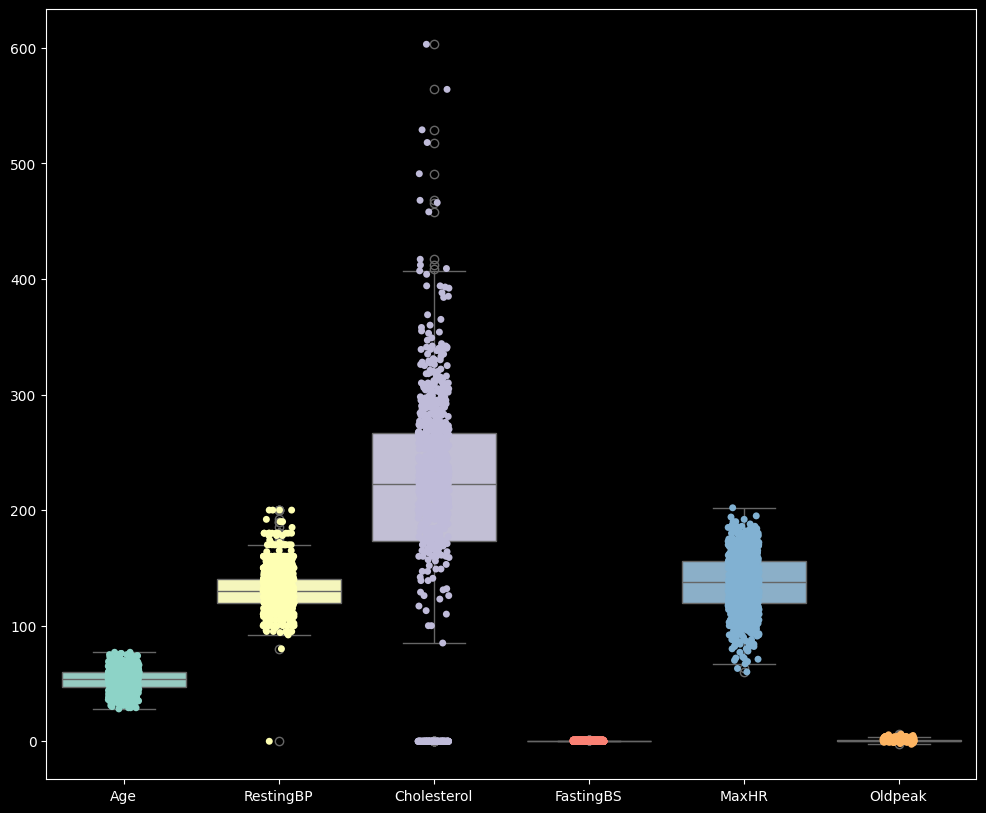

In [11]:
## Grafico box plot para análisar os outliers
fig, ax = plt.subplots(figsize=(12, 10))

sns.boxplot(data=df[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]])
sns.stripplot(data=df[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]])

plt.show()

Aqui para análisar as variáveis e se tem muito outliers, o que conseguimos observar e na variável colesterol unica que está bem disparelha. Isso ocorre por que i desvio padrão está muito alto.

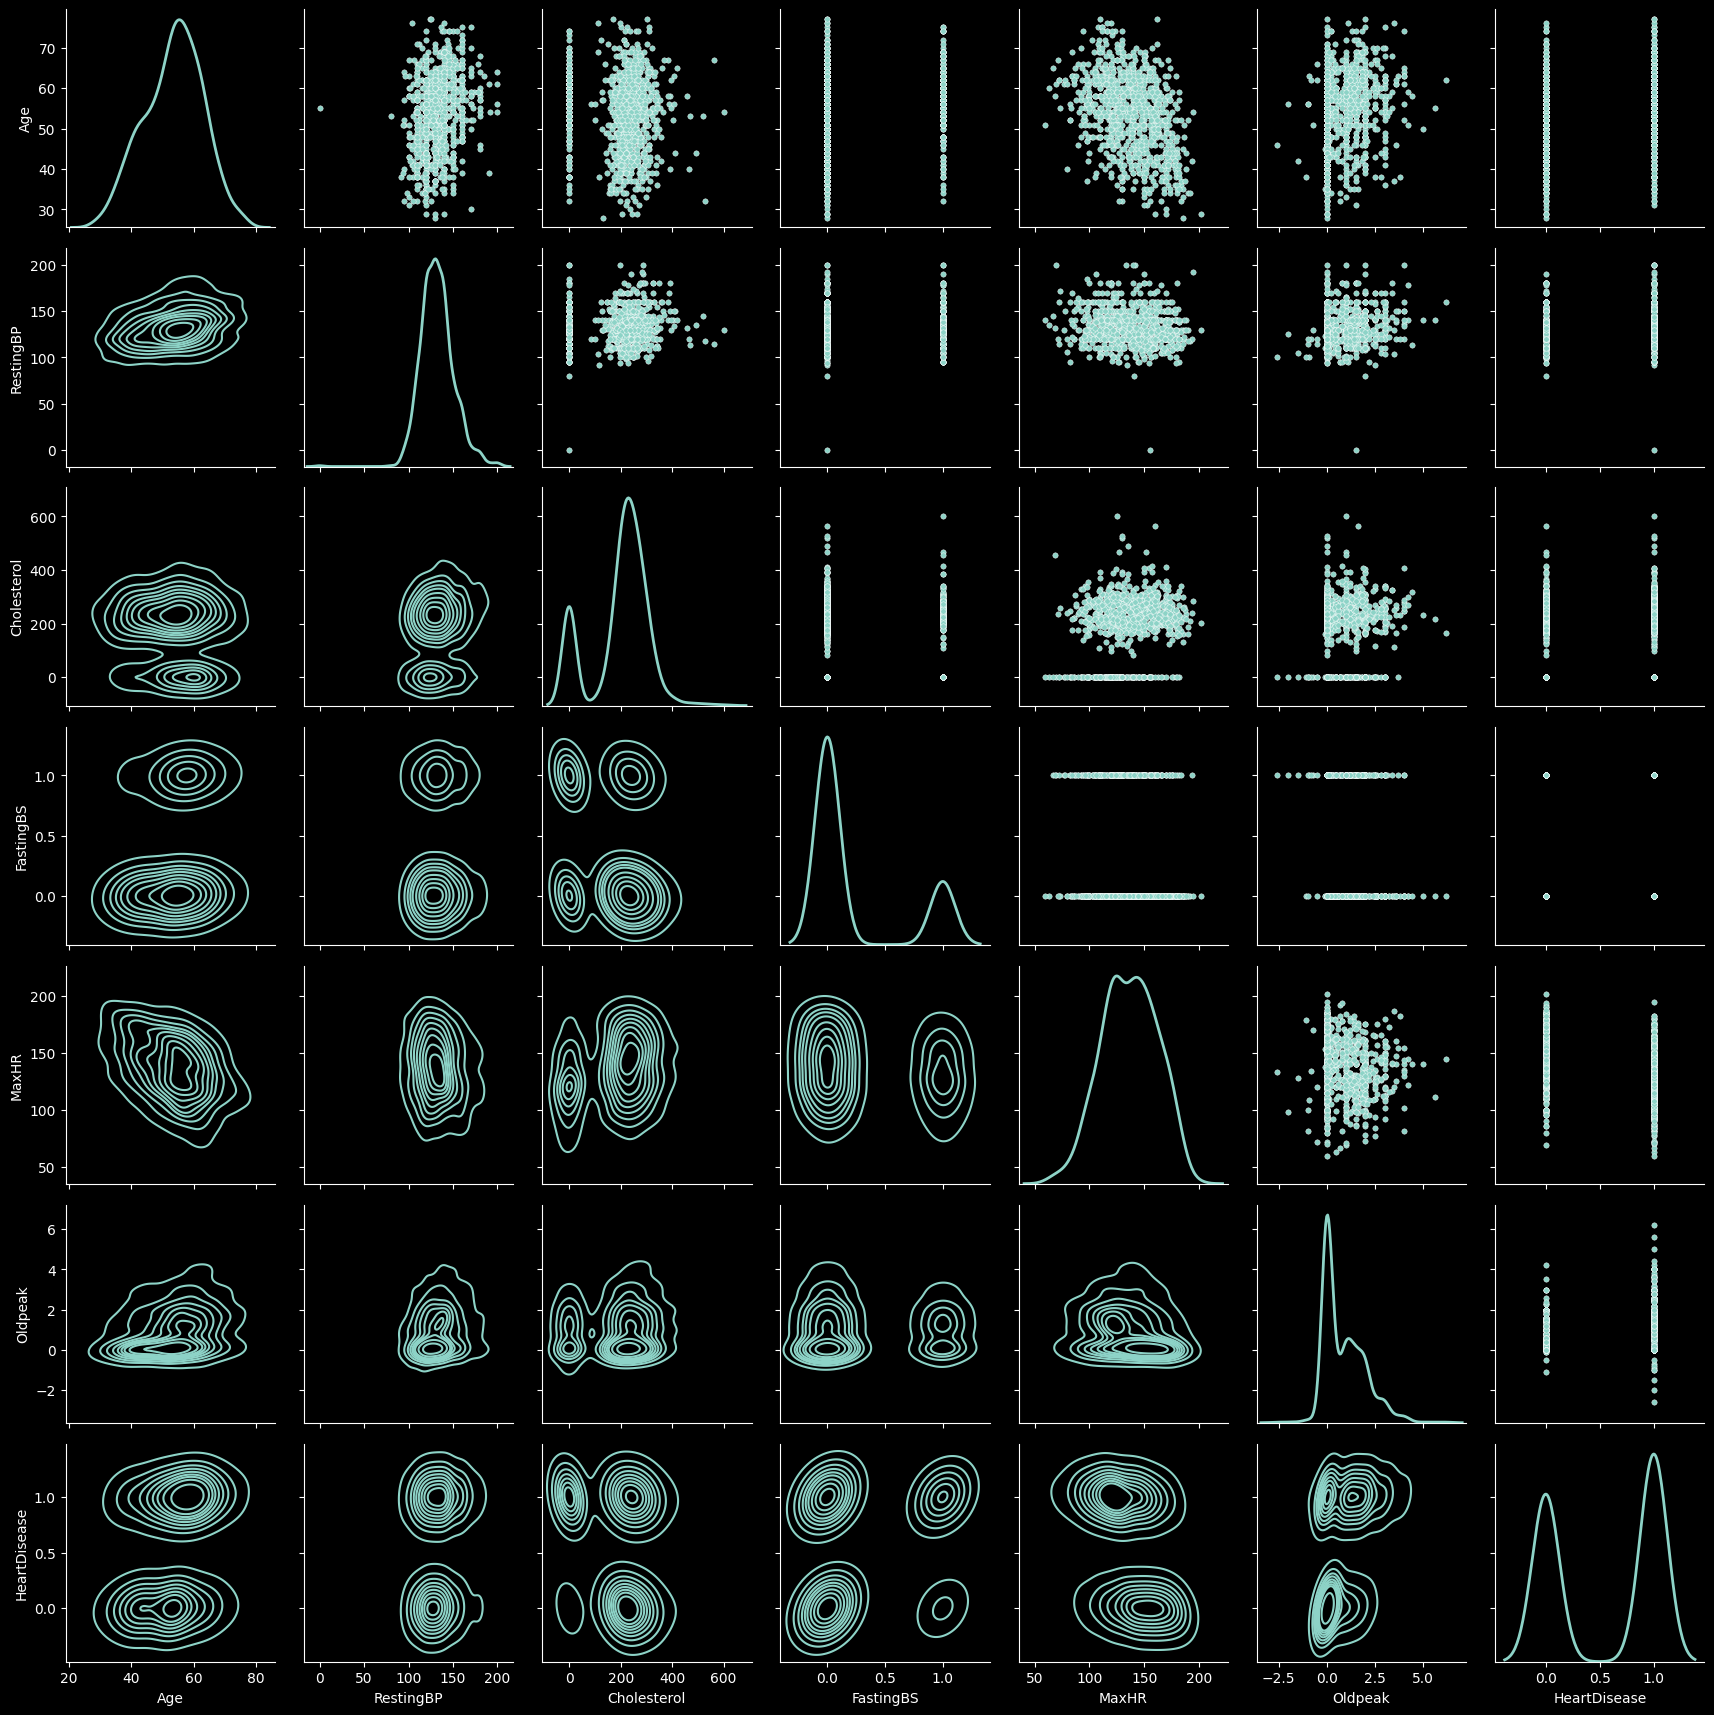

In [12]:
graph = sns.PairGrid(df, diag_sharey=False)
graph.map_upper(sns.scatterplot, s=15)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot, lw=2)

Aqui só estou análisando as distribuições das nossas variáveis dentro do dataframe.

----

In [13]:
print(df["HeartDisease"].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [14]:
print(df["HeartDisease"].value_counts()/ len(df) * 100)

HeartDisease
1    55.337691
0    44.662309
Name: count, dtype: float64


Aqui estamos análisando a distribuição de classes no nosso dataset, temos 44% sem doença cardiaca e 55% com a doença. No caso está bem balanceada assim podemos continuar.

In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
X = df.drop(["HeartDisease"], axis=1)
y = df[["HeartDisease"]]

In [18]:
X = pd.get_dummies(X)

In [19]:
X.iloc[:, 6:]

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,True,False,False,False,True,False,True,False,True,False,False,True,False
914,False,True,True,False,False,False,False,True,False,True,False,False,True,False
915,False,True,True,False,False,False,False,True,False,False,True,False,True,False
916,True,False,False,True,False,False,True,False,False,True,False,False,True,False


In [20]:
X.iloc[:, 6:] = X.iloc[:, 6:].map(lambda x: 1 if x == True else 0)

In [21]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


Aqui transformamos nossos dados categoricos em variáveis dummy, e também transformei o que era false em 0 e o que era em true em 1, por conta que tem modelos de ML que podem não aceitar valores como false e true.


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

In [24]:
from sklearn.model_selection import KFold

In [25]:
from tqdm import tqdm

In [26]:
## Class axiliar para ajudar no modelos de machine learn
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params["random_state"] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def predict(self, x):
        return self.clf.predict(x)

    def fit(self, x, y):
        return self.clf.fit(x, y)

    def feature_importances(self, x, y):
        return self.clf.fit(x, y).feature_importances_

    def score(self, x, y):
        return self.clf.score(x, y)

In [27]:
modelos = [
    {'nome': 'Dtree', 'modelo':DecisionTreeClassifier},
    {'nome': 'Knn', 'modelo':KNeighborsClassifier},
    {'nome': 'Rforest', 'modelo':RandomForestClassifier},
    {'nome': 'Nbayes', 'modelo': GaussianNB}
]

In [28]:
modelos[0]['nome']

'Dtree'

In [29]:
kf = KFold(7)

In [30]:
results = []
list_matrix = []


for model in tqdm(modelos):
    m = ModeloAuxiliar(clf=model['modelo'])
    k = 0
    for train_id, test_id in kf.split(X):
        ## saber a quantidade de folds que esta o modelo
        k += 1
        
        ## separando em train e test os dados
        X_train, X_test = X.iloc[train_id], X.iloc[test_id]
        y_train, y_test = y.iloc[train_id], y.iloc[test_id]
        
        ## treinar o modelo
        m.fit(X_train, y_train) 

        x_pred = m.predict(X_test)

        ## Avaliando as métricas
        precision = round(precision_score(y_test, x_pred, zero_division=0) * 100, 2)
        rev = round(recall_score(y_test, x_pred, zero_division=0) * 100, 2)
        acc = round(accuracy_score(y_test, x_pred) * 100, 2)  # Usando accuracy_score para calcular a acurácia
        f1 = round(f1_score(y_test, x_pred, zero_division=0) * 100, 2)
        
        results.append(
            {
                'Kfold': k,
                'nome': model['nome'],
                'score': acc,  # Usando a acurácia como score
                'precission': precision,
                'revocation': rev,
                'acc': acc,
                'f1-score': f1
            }
        )


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


In [31]:
ml_df = pd.DataFrame(results)

In [32]:
ml_df

,Kfold,nome,score,precission,revocation,acc,f1-score
0,1,Dtree,80.30,72.34,72.34,80.30,72.34
1,2,Dtree,87.79,85.71,82.35,87.79,84.00
2,3,Dtree,78.63,92.94,78.22,78.63,84.95
3,4,Dtree,80.15,88.12,86.41,80.15,87.25
4,5,Dtree,82.44,87.80,84.71,82.44,86.23
5,6,Dtree,70.99,68.42,66.10,70.99,67.24
6,7,Dtree,70.23,67.69,70.97,70.23,69.29
7,1,Knn,65.91,51.92,57.45,65.91,54.55
8,2,Knn,64.89,53.97,66.67,64.89,59.65
9,3,Knn,85.50,85.96,97.03,85.50,91.16


Agora que rodemos com 7 folds para cada modelo, assim agora precisamos apenas identificar qual é o melhor modelo para resolver nosso problema.

A grande pergunta que temos agora o que seria melhor avaliar para nosso problema? o score, a precission a revocation ou o f1-score ?

Como precisamos identificar o paciente com problemas cardiacos então as métricas que temos como foco é precission, f1-score e o recall.

In [33]:
ml_df.groupby('nome').agg({'precission':[np.mean, np.std, np.median]})

precission                  
              mean        std median
nome                                
Dtree    80.431429  10.565883  85.71
Knn      68.018571  13.472334  65.31
Nbayes   85.500000   5.749281  85.45
Rforest  85.042857   7.070294  86.67

In [34]:
ml_df.groupby('nome').agg({'f1-score':[np.mean, np.std, np.median]})

f1-score                  
              mean        std median
nome                                
Dtree    78.757143   8.729856  84.00
Knn      68.344286  15.253245  59.65
Nbayes   85.014286   7.005612  87.38
Rforest  86.144286   6.870931  88.89

In [35]:
ml_df.groupby('nome').agg({'revocation':[np.mean, np.std, np.median]})

revocation                  
              mean        std median
nome                                
Dtree    77.300000   7.685046  78.22
Knn      69.410000  18.182392  66.67
Nbayes   84.781429   9.495854  88.24
Rforest  87.580000   8.775335  91.76

O que foi escolhido então foi o Rforest, por conta da precission estar bem boa e ter uma mediana boa também outro modelo bom foi o Nbayes por conta de ter um pequeno desvio padrão.

----

Agora que temos o nosso modelo, podemos ir para a parte de melhorar o modelo com os hiperparametros.

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
cv = 5

In [58]:
rf = RandomForestClassifier()

In [59]:
param_grid = {
    'n_estimators':[100,200, 300],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[4,6,8,10],
    'criterion':['gini', 'entropy']
}

In [60]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='precision', n_jobs=-1)

In [61]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [62]:
best_params = grid_search.best_params_
print("Melhores parâmetros :", best_params)


Melhores parâmetros : {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [80]:
best_score = grid_search.best_score_
print("Melhor pontuação :", round(best_score*100, 2))

Melhor pontuação : 87.87


Tivemos um bom modelo de 85% porem agora vamos rodar um randomsearch para notar se temos alguma diferença

In [67]:
param_grid = {
    'n_estimators':scipy.stats.randint(100, 500),
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':scipy.stats.randint(5, 15),
    'criterion':['gini', 'entropy']
}

In [71]:
rand_search = RandomizedSearchCV(rf, param_grid, scoring='precision', n_iter=30, verbose=3)

In [72]:
rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=268;, score=0.908 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=268;, score=0.900 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=268;, score=0.839 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=268;, score=0.859 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=268;, score=0.839 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=130;, score=0.896 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=130;, score=0.900 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=130;, score=0.841 total time=   0.2s
[CV 4/5] END criterion=gini

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019A98625550>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019A985E3210>},
                   scoring='precision', verbose=3)

In [78]:
print("O melhor escore encontrado", round(rand_search.best_score_ *100, 2))

o melhor escore encontrado 87.42


In [81]:
print("Os melhores hiperparametros: ", rand_search.best_params_)

Os melhores hiperparametros:  {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 239}


#### Conclusão
O melhor modelo é o randomforest com os parâmetros : **{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}** com uma precisão de **87.87%**